# Speedup Analysis

PowerPoint, 1_Introduction, Slide 19:


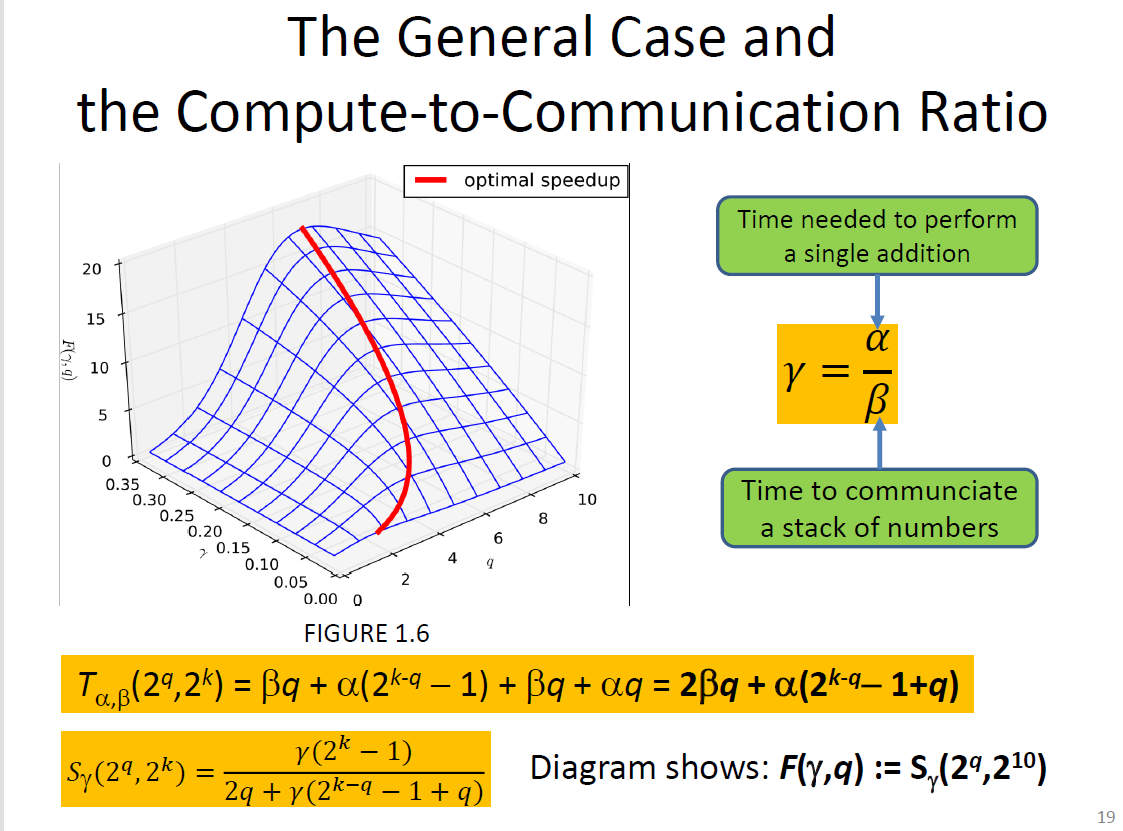



In [8]:
import numpy as np

# Timing function for multi-processor computing
def t(p, n, α, β): 
  # t Returns computing time
  # Input Parameters:
  # 	p number of processors (PEs)
  # 	n problem size, i.e. number of elements to sum
  # 	a unit compute time (α alpha)
  # 	b unit communication time (β beta)
    q = np.log2(p)
    k = np.log2(n)
    if (p < n) :
        return 2*β*q + α*(n/p - 1 + q) # 1_Introduction slide 19
    else :
        return 2*β*(k-1) + α*k  # set q = k-1


In [9]:
# for p =1024, only 512 processor elements are used
[t(512, 1024, 1, 3), t(1024, 1024, 1, 3)] 

[64.0, 64.0]

# Speedup Analysis for n = 1024

In [10]:
# define speedup for beta communication time unit and alpha compute unit, respectively, for n = 1024, 
# as function of number of processor elements 2^q (note 2^10 = 1024)

def s(q, α, β):
    return t(1,1024, α, β) / t(2**q, 1024, α, β)

def s_0(q):
    return t(1,1024, 1,0) / t(2**q, 1024, 1, 0) # s(q, 1, 0)
def s_1(q):
    return t(1,1024, 1,1) / t(2**q, 1024, 1, 1) # s(q, 1, 1)
def s_2(q):
    return t(1,1024, 1,2) / t(2**q, 1024, 1, 2) # s(q, 1, 2)
def s_3(q):
    return t(1,1024, 1,3) / t(2**q, 1024, 1, 3) # s(q, 1, 3)

In [11]:
# Try to find q for optimal speedup for n = 1024 and beta = 3
[(5,s_3(5)), (6,s_3(6)), (7,s_3(7)), (8,s_3(8)), (9,s_3(9)), 
 (10,s_3(10)), (11,s_3(11))]

[(5, 15.5),
 (6, 17.94736842105263),
 (7, 18.267857142857142),
 (8, 17.338983050847457),
 (9, 15.984375),
 (10, 15.984375),
 (11, 15.984375)]

# Plot Speedup vs Number of PEs for various beta values

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Plot Speedup vs Number of PEs for beta = 0

In [13]:
x = np.linspace(0, 10, 100)
y0 = [s(q, 1, 0) for q in x]

speedup_0 = []
for q in np.linspace (0, 10, 11):
    speedup_0.append(s(q, 1, 0))

([<matplotlib.axis.XTick at 0x1f43b23aeb0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '8'),
  Text(4, 0, '16'),
  Text(5, 0, '32'),
  Text(6, 0, '64'),
  Text(7, 0, '126'),
  Text(8, 0, '256'),
  Text(9, 0, '512'),
  Text(10, 0, '1024')])

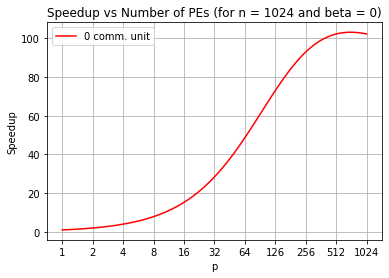

In [14]:
# Plot Speedup vs number of PEs for 0 comm.cost 
# (using MATLAB like interface)

plt.plot(x, y0, '-r', label = "0 comm. unit")
plt.ylabel("Speedup")
plt.xlabel("p")
plt.legend()
plt.title("Speedup vs Number of PEs (for n = 1024 and beta = 0)")
plt.grid(True)
# set xtick positions and labels
plt.xticks([0,1,2,3,4,5,6,7,8,9, 10], 
           ['1','2','4','8','16','32','64','126','256','512', '1024']) 

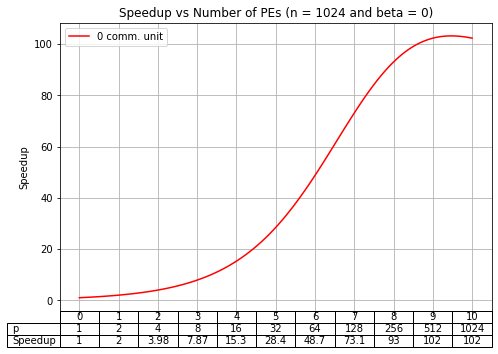

In [15]:
# Plot Speedup vs # of PEs for 0 comm.cost 
# (using object-oriented interface)

# First create a grid of plots
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(x, y0, '-r', label = "0 comm. unit")
ax.grid(True)
# set xtick positions and labels
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
#ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512', '1024']) 
ax.set_xticklabels([]) 
ax.set_ylabel("Speedup")
#ax.set_xlabel("p")
ax.legend()
ax.set_title("Speedup vs Number of PEs (n = 1024 and beta = 0)") 

# Display 2D table as x-labels
rowLabels = ['p', 'Speedup']
columnLabels = ('0','1','2','3','4','5','6','7','8','9','10')
row_1 = ['1','2','4','8','16','32','64','128','256','512','1024']
row_2 = ['%0.3g' % (x) for x in speedup_0]
ax.table(cellText = [row_1, row_2], rowLabels = rowLabels, colLabels = columnLabels, loc='bottom', cellLoc='center')

## Plot Speedup vs number of PEs for beta = 1, 2, and 3

In [16]:
x = np.linspace(0, 9, 100)

y3 = [s_3(q) for q in x]
y2 = [s_2(q) for q in x]
y1 = [s_1(q) for q in x]

speedup_3 = []
for q in np.linspace (0, 9, 10):
    speedup_3.append(s_3(q))

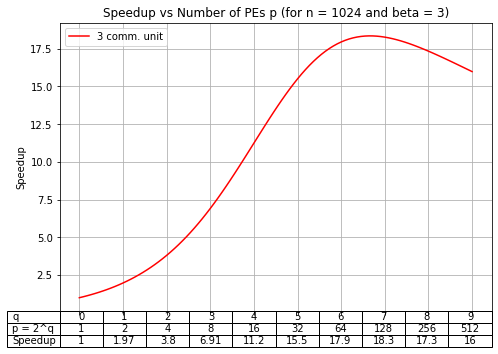

In [17]:
# Plot Speedup vs # of processors for 3 comm.cost 
# (using object-oriented interface)

# First create a grid of plots
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(x, y3, '-r', label = "3 comm. unit")
ax.grid(True)
# set xtick positions and labels
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
#ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512']) 
ax.set_xticklabels([]) 
ax.set_ylabel("Speedup")
#ax.set_xlabel("p")
ax.legend()
ax.set_title("Speedup vs Number of PEs p (for n = 1024 and beta = 3)") 

# Display 2D table as x-labels
rowLabels = ['q', 'p = 2^q', 'Speedup']
row_0 = ('0','1','2','3','4','5','6','7','8','9')
row_1 = ['1','2','4','8','16','32','64','128','256','512']
row_2 = ['%0.3g' % (x) for x in speedup_3]
ax.table(cellText = [row_0, row_1, row_2], rowLabels = rowLabels, loc='bottom', cellLoc='center')

([<matplotlib.axis.XTick at 0x1f43b823760>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '8'),
  Text(4, 0, '16'),
  Text(5, 0, '32'),
  Text(6, 0, '64'),
  Text(7, 0, '126'),
  Text(8, 0, '256'),
  Text(9, 0, '512')])

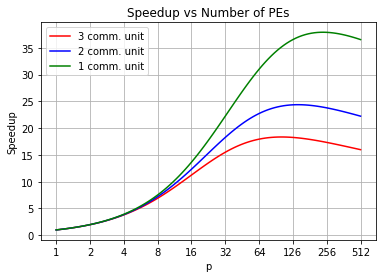

In [18]:
# Plot Speedup vs # of processors for comm. costs 3, 2, and 1 
# (using MATLAB like interface)
plt.plot(x, y3, '-r', label = "3 comm. unit")
plt.plot(x, y2, '-b', label = "2 comm. unit")
plt.plot(x, y1, '-g', label = "1 comm. unit")
plt.ylabel("Speedup")
plt.xlabel("p")
plt.legend()
plt.title("Speedup vs Number of PEs")
plt.grid(True)
# set xtick positions and labels
plt.xticks([0,1,2,3,4,5,6,7,8,9], 
        ['1','2','4','8','16','32','64','126','256','512']) 

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '4'),
 Text(3, 0, '8'),
 Text(4, 0, '16'),
 Text(5, 0, '32'),
 Text(6, 0, '64'),
 Text(7, 0, '126'),
 Text(8, 0, '256'),
 Text(9, 0, '512')]

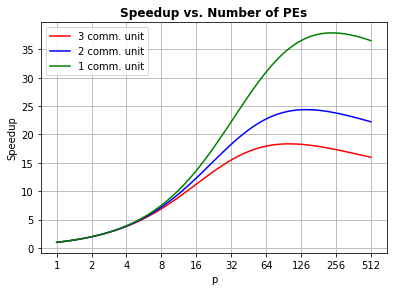

In [19]:
# Like last cell, same plot, but using object-oriented interface 
fig = plt.figure()
ax = fig.add_axes([0.11, 0.11, 0.8, 0.8])

ax.plot(x, y3, '-r')
ax.plot(x, y2, '-b')
ax.plot(x, y1, '-g')
ax.set_ylabel("Speedup")
ax.set_xlabel("p")
ax.legend(labels = ("3 comm. unit","2 comm. unit","1 comm. unit"), 
          loc = "upper left")
ax.set_title("Speedup vs. Number of PEs", fontweight="bold")
ax.grid()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512'])

 Volume in drive C has no label.
 Volume Serial Number is A2F0-DB24

 Directory of c:\Users\cmkle\git\cse625-parallel-programming\Project1\lib

09/09/2022  04:49 PM            35,363 SpeedUp.jpg
               1 File(s)         35,363 bytes
               0 Dir(s)  773,338,705,920 bytes free


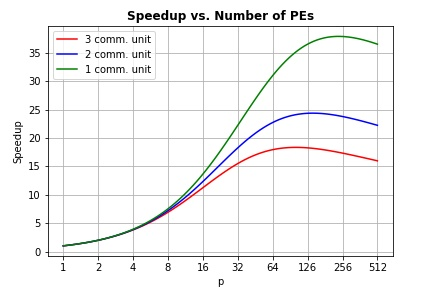

In [20]:
# Save the plot in a local image file
fig.savefig('SpeedUp.jpg')

# Windows OS command - dir
!dir *.jpg

# To confirm that it contains what we think it contains, let's use the IPython Image object to display the contents
# this file:
from IPython.display import Image
Image('SpeedUp.jpg')

# Strong Efficieny Scalabilty



In [21]:
# Efficiency (for n =1024, comm. cost = 3)
def e_3(q) :
    return (s_3(q) * 100.0) / (2**q)

ex = [0,1,2,3,4,5,6,7,8,9]

ey_3 = []
for q in ex:
    ey_3.append(e_3(q))
    
[round(num, 2) for num in ey_3]

[100.0, 98.75, 95.07, 86.4, 70.26, 48.44, 28.04, 14.27, 6.77, 3.12]

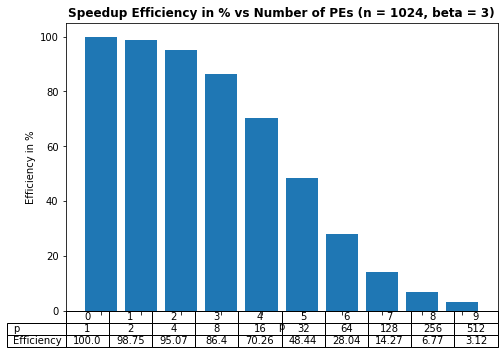

In [22]:
# Efficiency scalability bar plot (for n =104 and comm cost = 3)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(ex, ey_3)

ax.set_ylabel("Efficiency in %")
ax.set_xlabel("p")
ax.set_title("Speedup Efficiency in % vs Number of PEs (n = 1024, beta = 3)",
            fontweight="bold")
ax.set_xticks(ex)
ax.set_xticklabels([])
#ax.set_xticklabels(['1','2','4','8','16','32','64','126','256','512'])

# Display 2D table as x-labels
rowLabels = ['p', 'Efficiency']
columnLabels = ('0','1','2','3','4','5','6','7','8','9')
row_1 = ['1','2','4','8','16','32','64','128','256','512']
row_2 = [round(num, 2) for num in ey_3]
ax.table(cellText = [row_1, row_2], rowLabels = rowLabels, colLabels = columnLabels, loc='bottom', cellLoc='center')

In [23]:
# Efficiency (for n =1024, comm. cost = 0)
def e_0(q) :
    return (s_0(q) * 100.0) / (2**q)

ex = [0,1,2,3,4,5,6,7,8,9]
ey_0 = []
for q in ex:
    ey_0.append(e_0(q))
ey_0

[100.0,
 99.90234375,
 99.5136186770428,
 98.36538461538461,
 95.42910447761194,
 88.80208333333334,
 76.11607142857143,
 57.08705357142857,
 36.328125,
 19.98046875]

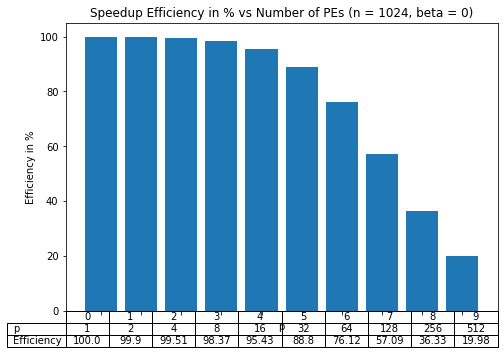

In [25]:
# Efficiency scalability bar plot (for n =104 and comm cost = 0)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(ex, ey_0)

ax.set_ylabel("Efficiency in %")
ax.set_xlabel("p")
ax.set_title("Speedup Efficiency in % vs Number of PEs (n = 1024, beta = 0)")
ax.set_xticks(ex)
ax.set_xticklabels([])

row_2 = [round(num, 2) for num in ey_0]

# Display 2D table as x-labels
rowLabels = ['p', 'Efficiency']
columnLabels = ('0','1','2','3','4','5','6','7','8','9')
row_1 = ['1','2','4','8','16','32','64','128','256','512']
#row_2 = ['%0.3g' % (x) for x in speedup_3]
ax.table(cellText = [row_1, row_2], rowLabels = rowLabels, colLabels = columnLabels, loc='bottom', cellLoc='center')